# Learning the Einstein Relation

Given the 4 momentum of a particle, I am hoping for the neural network to learn the formula $$M^2 = E^2 - p^2$$

This is basically the exact same code as the first and second "TensorFlow Einstein Relation Notebook" but I wanted to split it so that way I could plot the graphs and so we can compare results with old/new notebook.

Starting off, we will read the input data as usual:

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
particleDataTrain = pd.read_csv("1000Points.csv")
particleDataTest = pd.read_csv("500TestPoints.csv")
dataInput = []
dataOutput = []
dataInput.append(particleDataTest[['E', 'px', 'py', 'pz']])
dataInput.append(particleDataTest[['E2', 'px2', 'py2', 'pz2']])
dataOutput.append(particleDataTest[['m']])
dataOutput.append(particleDataTest[['m2']])
dataOutput.append(particleDataTest[['errM5']])
dataOutput.append(particleDataTest[['errM50']])
dataOutput.append(particleDataTest[['errMGnarrow']])
dataOutput.append(particleDataTest[['errMGwide']])
x_train = particleDataTrain[['E', 'px', 'py', 'pz']]
y_train = particleDataTrain[['m']]
x_test = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
title = ["4 momentum v. m", "4 momentum v. m2", "4 momentum v. errM5", "4 momentum v. errM50", "4 momentum v. errMGnarrow"]
title.extend(["4 momentum v. errMGwide", "4 momentum2 v. m", "4 momentum2 v. m2", "4 momentum2 v. errM5"])
title.extend(["4 momentum2 v. errM50", "4 momentum2 v. errMGnarrow", "4 momentum2 v. errMGwide"])
for i in range (0, 2):
    for j in range (0, 6):
        x_test[i * 6 + j] = dataInput[i]
        y_test[i * 6 + j] = dataOutput[j]

The next part will be implementing the network topology using TensorFlow.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

#model
model = tf.keras.Sequential()
model.add(keras.layers.InputLayer(4))
for i in range(2): #number of hidden layers, can be changed
    model.add(keras.layers.Dense(4, activation = 'relu'))
model.add(keras.layers.Dense(1))
#print(model.summary()) #check if topology working correctly

#loss and optimizer
loss = keras.losses.MeanSquaredError() #using MSE for error calculation
optimizer = keras.optimizers.Adam(learning_rate = 0.003) #put in learning rat
metrics = ["accuracy"] #metric
model.compile(loss = loss, optimizer = optimizer, metrics = metrics) #configure model for training

Next up is training the model:

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
#training data
batch_size = 32 #batch size
epochs = 15 #epochs, can be adjusted
history1 = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, shuffle = True, verbose = 2)

Epoch 1/15
32/32 - 0s - loss: 72927256.0000 - accuracy: 0.0000e+00 - 482ms/epoch - 15ms/step
Epoch 2/15
32/32 - 0s - loss: 48996100.0000 - accuracy: 0.0000e+00 - 51ms/epoch - 2ms/step
Epoch 3/15
32/32 - 0s - loss: 36667060.0000 - accuracy: 0.0000e+00 - 51ms/epoch - 2ms/step
Epoch 4/15
32/32 - 0s - loss: 27380130.0000 - accuracy: 0.0000e+00 - 51ms/epoch - 2ms/step
Epoch 5/15
32/32 - 0s - loss: 18187466.0000 - accuracy: 0.0000e+00 - 44ms/epoch - 1ms/step
Epoch 6/15
32/32 - 0s - loss: 9220866.0000 - accuracy: 0.0000e+00 - 47ms/epoch - 1ms/step
Epoch 7/15
32/32 - 0s - loss: 3096110.7500 - accuracy: 0.0000e+00 - 50ms/epoch - 2ms/step
Epoch 8/15
32/32 - 0s - loss: 822108.3750 - accuracy: 0.0000e+00 - 57ms/epoch - 2ms/step
Epoch 9/15
32/32 - 0s - loss: 340825.9375 - accuracy: 0.0000e+00 - 48ms/epoch - 2ms/step
Epoch 10/15
32/32 - 0s - loss: 181990.8906 - accuracy: 0.0000e+00 - 47ms/epoch - 1ms/step
Epoch 11/15
32/32 - 0s - loss: 96780.5391 - accuracy: 0.0000e+00 - 41ms/epoch - 1ms/step
Epoch 

Plotting the training performance of the neural network:

dict_keys(['loss', 'accuracy'])


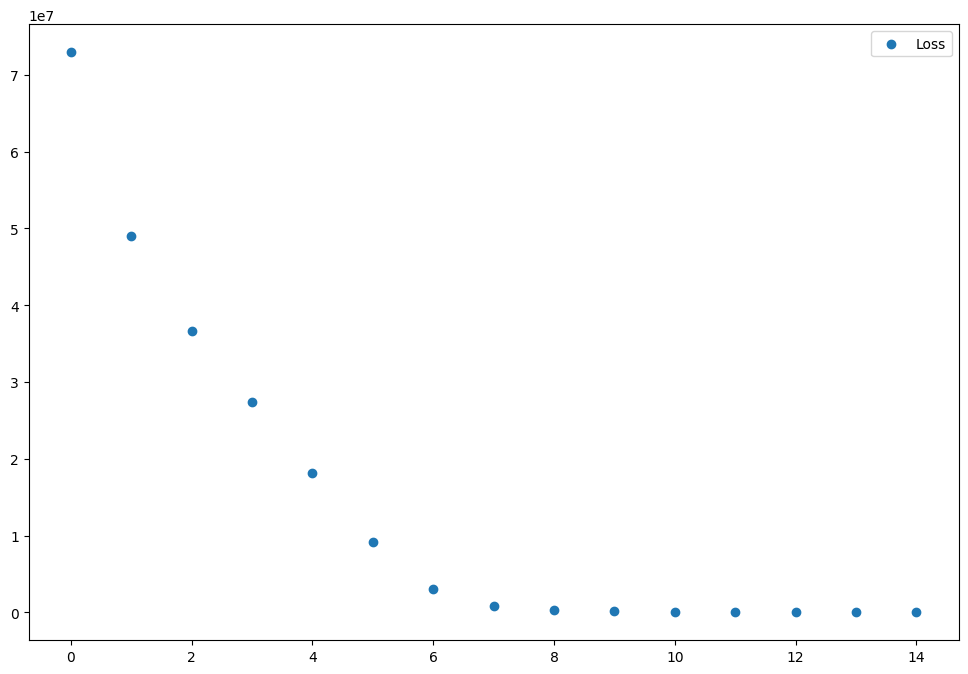

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math
fig1, axs1 = plt.subplots(1, 1, figsize = (12,8))
print(history1.history.keys())
epochRange = range(0, len(history1.history['loss']))
axs1.scatter(epochRange,(history1.history['loss']), label = 'Loss')
axs1.legend(loc = 'upper right')

This part is testing the neural network.

16/16 [==============================] - 0s 2ms/step


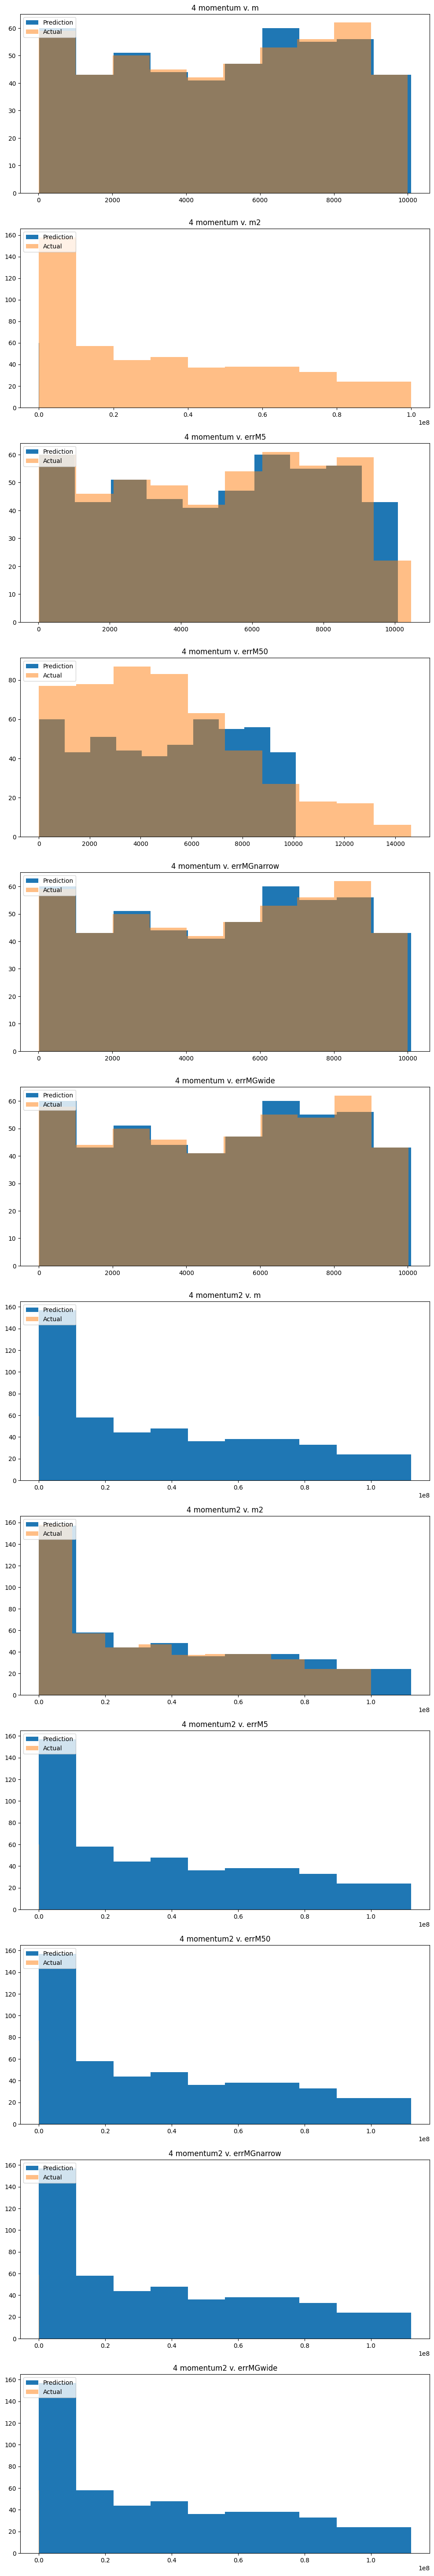

In [7]:
from matplotlib import pyplot as plt
fig2, axs2 = plt.subplots(12, 1, figsize = (12, 75))
for i in range(0, 12):
    pred = model.predict(x_test[i])
    actual = y_test[i]
    axs2[i].hist(pred, bins = 10, label = "Prediction")
    axs2[i].hist(actual, bins = 10, label = "Actual", alpha = 0.5)
    axs2[i].legend(loc = 'upper left')
    axs2[i].set_title(title[i])
# pred = models[i].predict([[10, 0, 0, 0]])
# print(pred)